In [1]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
import pandas as pd
from omegaconf import OmegaConf
from pathlib import Path
from pprint import pprint
# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# mycode
from repo import REPO
from ml_utilities.output_loader.result_loader import SweepResult, JobResult
from ml_utilities.output_loader import create_job_output_loader
from ml_utilities.output_loader.plot import plot_sweep_summary, plot_data_log_values
from tflearning.mode_connectivity.instability_analysis import InstabilityAnalyzer
from tflearning.mode_connectivity.plot import plot_barriers, plot_instability, plot_distances
from tflearning.learning_dynamics.covariance_analysis import GradCovarianceAnalyzer
from tflearning.learning_dynamics.plot import plot_covariance_statistics

# 15 Lenet Linear mode connectivity

Reference: Frankle, Jonathan, Gintare Karolina Dziugaite, Daniel M. Roy, and Michael Carbin. 2020. “Linear Mode Connectivity and the Lottery Ticket Hypothesis.” arXiv. http://arxiv.org/abs/1912.05671.


**RERUN 15**: Fixed multiple bugs (i.e. in training loop). 

On MNIST the Lenet architecture is stable already at initialization. 
With this experiment we want to investigate whether this is due to the simple dataset (MNIST) or due to the small architecture. Therefore we rerun the same experiment on CIFAR10 with a larger input layer.


## MNIST Instability analysis

In [2]:
spec = 'mnist-lenet'
path = '/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/IA-B-mnist-15.2.1-lenet--230124_103821'
insta = InstabilityAnalyzer.reload(sweep_result_dir=path, instability_folder_suffix='')

In [3]:
# load training jobs
sweepr = insta.instability_sweep
mainjob = insta.main_training_job

In [5]:
# mainjob.all_log_columns

In [6]:
mainjob.get_summary(log_source='val', col_sel='Accuracy')

,best_train_step,best_val_score,Accuracy-train_step-14500,seed
IA-A-mnist-15.2.1-lenet--230124_103602,14500,0.983333,0.983333,0


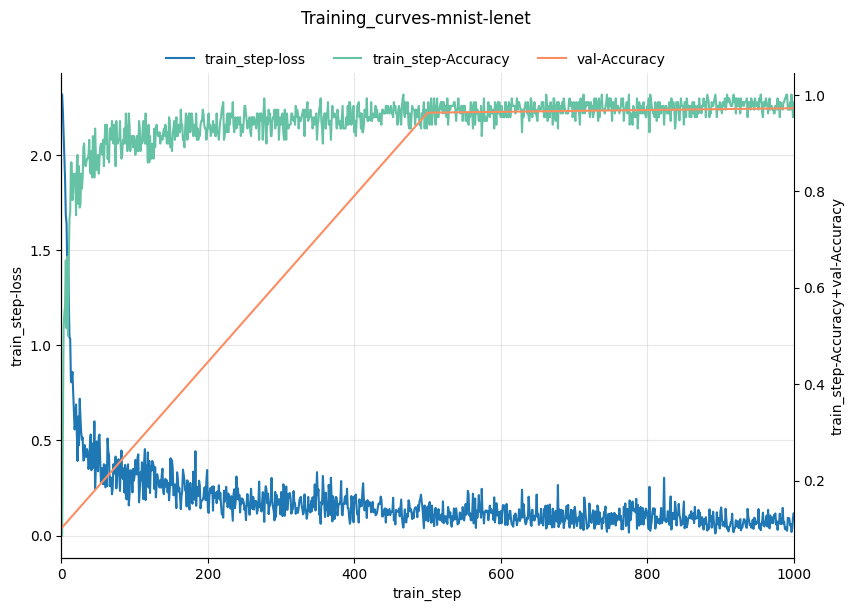

In [7]:
mj_dl = mainjob.get_data_log(['train_step', 'val'])
f = plot_data_log_values(mj_dl, y_axis_left=['train_step-loss'], y_axis_right=['train_step-Accuracy', 'val-Accuracy'], xlim=(0, 1000), x_axis='train_step', title=f'Training_curves-{spec}', savefig=True)

In [8]:
sweepr.get_summary()

,best_train_step,best_val_score,trainer.resume_training.checkpoint_idx,seed
IA-B-mnist-15.2.1-lenet--checkpoint_idx-0-seed-1--230124_103853,21500,0.985000,0,1
IA-B-mnist-15.2.1-lenet--checkpoint_idx-100-seed-1--230124_103852,12000,0.982333,100,1
IA-B-mnist-15.2.1-lenet--checkpoint_idx-1000-seed-1--230124_103847,21000,0.982333,1000,1
IA-B-mnist-15.2.1-lenet--checkpoint_idx-10000-seed-1--230124_103840,19500,0.984333,10000,1
IA-B-mnist-15.2.1-lenet--checkpoint_idx-15000-seed-1--230124_103853,22000,0.981667,15000,1
IA-B-mnist-15.2.1-lenet--checkpoint_idx-2000-seed-1--230124_103854,23000,0.983000,2000,1
IA-B-mnist-15.2.1-lenet--checkpoint_idx-250-seed-1--230124_103850,20500,0.984833,250,1
IA-B-mnist-15.2.1-lenet--checkpoint_idx-50-seed-1--230124_103844,15500,0.982167,50,1
IA-B-mnist-15.2.1-lenet--checkpoint_idx-500-seed-1--230124_103851,18000,0.983667,500,1
IA-B-mnist-15.2.1-lenet--checkpoint_idx-5000-seed-1--230124_103837,20000,0.983167,5000,1


In [9]:
# df = insta.combined_results_dfs['datasets'].loc['default_params']
# df

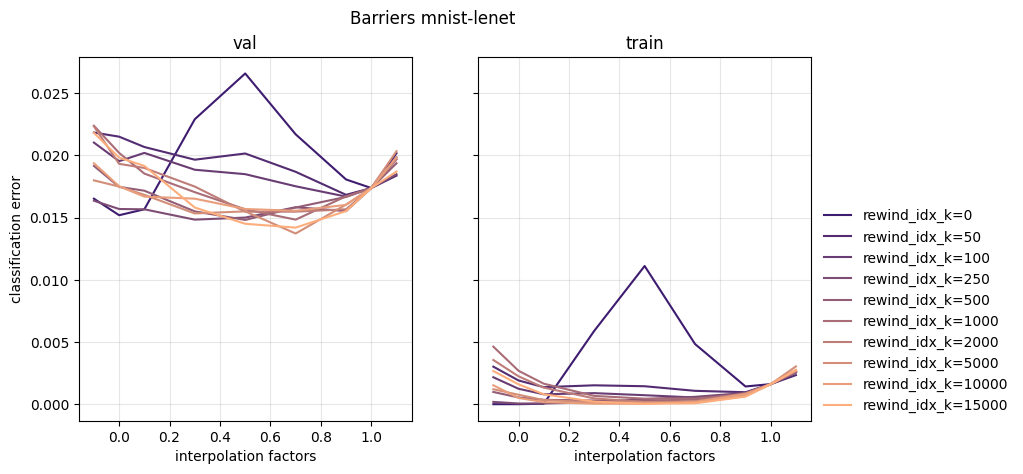

In [10]:
f = plot_barriers(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Barriers {spec}', save_format='png')

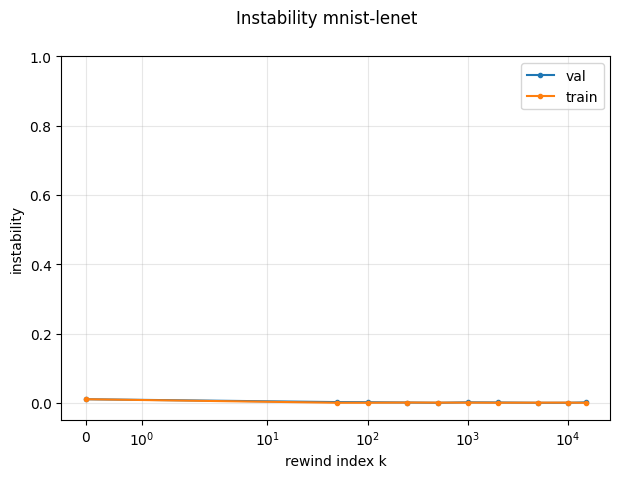

In [11]:
f = plot_instability(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Instability {spec}', x_scale='symlog', save_format='png')

In [4]:
grada = GradCovarianceAnalyzer(job=mainjob, checkpoint_idxs=[], num_batches=[25], batch_sizes=[128], device='cuda:0', save_folder_suffix='', save_to_disk=True)
stats, eigvals = grada.covariance_analysis()

The save folder already exists. Reloading those results. To recompute choose different save_folder_suffix.


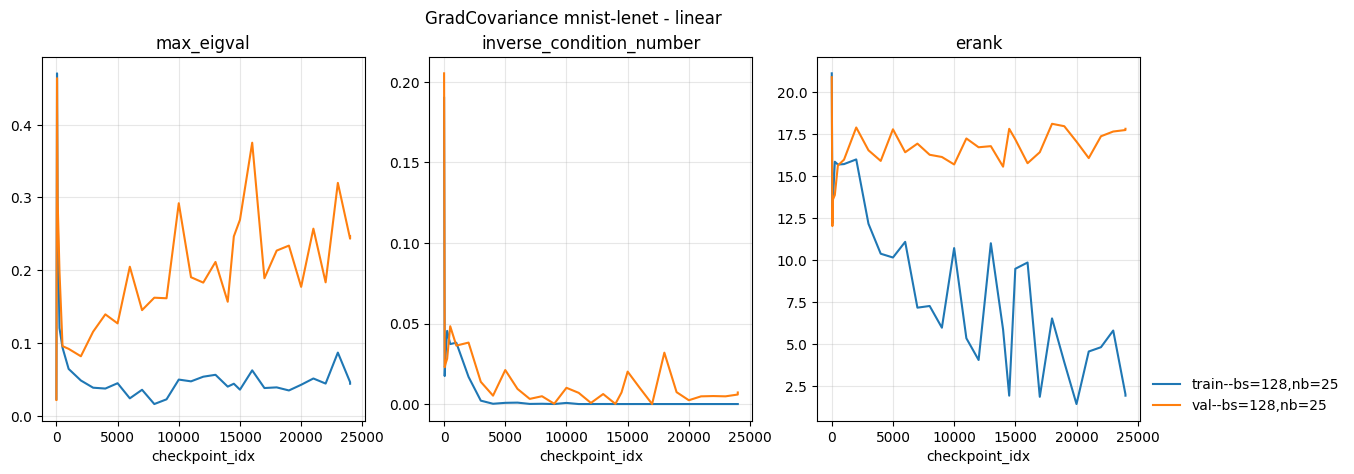

In [17]:
scale = 'linear'
f = plot_covariance_statistics(stats, title=f'GradCovariance {spec} - {scale}', save_format='png', x_scale=scale)

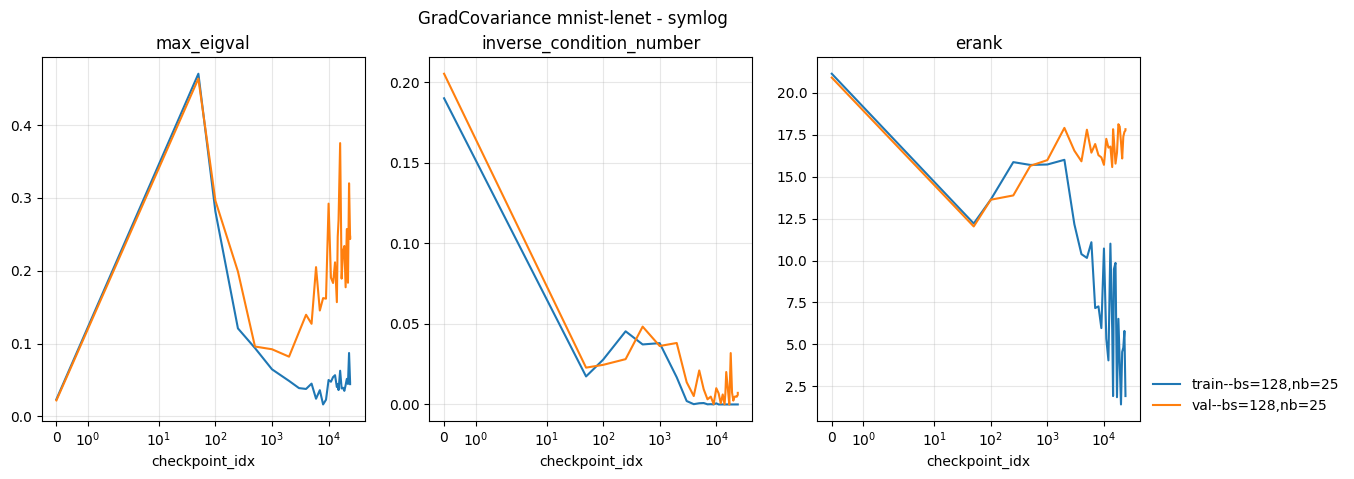

In [18]:
scale = 'symlog'
f = plot_covariance_statistics(stats, title=f'GradCovariance {spec} - {scale}', save_format='png', x_scale=scale)

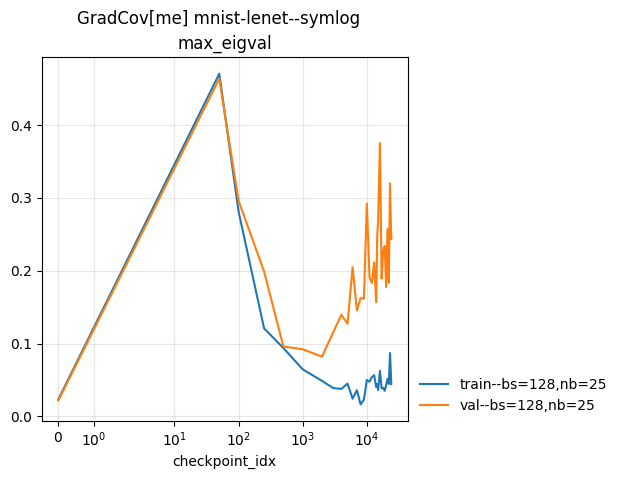

In [7]:
scale = 'symlog'
f = plot_covariance_statistics(stats, title=f'GradCov[me] {spec}--{scale}', save_format='png', x_scale=scale, statistic_names=['max_eigval'], figsize=(1 * 12 * 1 / 2.54, 1.5 * 8 * 1 / 2.54))

In [13]:
df = insta.combined_results_dfs['distances'].loc['default_params']
df

distances                                                                            l2distance  \
init_model_idx_k job                                           seeds  model_idxes                 
0                IA-B-mnist-15.2.1-lenet--checkpoint_idx-0     (1, 0) (21500, 14500)  61.745056   
                                                                      (24001, 24001)  61.745056   
50               IA-B-mnist-15.2.1-lenet--checkpoint_idx-50    (1, 0) (15500, 14500)  49.728149   
                                                                      (24000, 24001)  49.728149   
100              IA-B-mnist-15.2.1-lenet--checkpoint_idx-100   (1, 0) (12000, 14500)  48.779640   
                                                                      (24000, 24001)  48.779640   
250              IA-B-mnist-15.2.1-lenet--checkpoint_idx-250   (1, 0) (20500, 14500)  45.338310   
                                                                      (24000, 24001)  45.338310   
500              IA-B-mnist-15.2.1-lenet--checkpoint_idx-500   (1, 0) (18000, 14500)  40.928631   
                                                                      (24000, 24001)  43.888268   
1000             IA-B-mnist-15.2.1-lenet--checkpoint_idx-1000  (1, 0) (21000, 14500)  40.667820   
                                                                      (24000, 24001)  40.667820   
2000             IA-B-mnist-15.2.1-lenet--checkpoint_idx-2000  (1, 0) (23000, 14500)  37.359238   
                                                                      (24000, 24001)  38.177433   
5000             IA-B-mnist-15.2.1-lenet--checkpoint_idx-5000  (1, 0) (20000, 14500)  33.748154   
                                                                      (24000, 24001)  35.185520   
10000            IA-B-mnist-15.2.1-lenet--checkpoint_idx-10000 (1, 0) (19500, 14500)  30.701006   
                                                                      (24000, 24001)  30.701006   
15000            IA-B-mnist-15.2.1-lenet--checkpoint_idx-15000 (1, 0) (22000, 14500)  24.189323   
                                                                      (24000, 24001)  25.163282   

distances                                                                            cosinesimilarity  
init_model_idx_k job                                           seeds  model_idxes                      
0                IA-B-mnist-15.2.1-lenet--checkpoint_idx-0     (1, 0) (21500, 14500)         0.439704  
                                                                      (24001, 24001)         0.439704  
50               IA-B-mnist-15.2.1-lenet--checkpoint_idx-50    (1, 0) (15500, 14500)         0.674869  
                                                                      (24000, 24001)         0.674869  
100              IA-B-mnist-15.2.1-lenet--checkpoint_idx-100   (1, 0) (12000, 14500)         0.687706  
                                                                      (24000, 24001)         0.687706  
250              IA-B-mnist-15.2.1-lenet--checkpoint_idx-250   (1, 0) (20500, 14500)         0.729103  
                                                                      (24000, 24001)         0.729103  
500              IA-B-mnist-15.2.1-lenet--checkpoint_idx-500   (1, 0) (18000, 14500)         0.759095  
                                                                      (24000, 24001)         0.748626  
1000             IA-B-mnist-15.2.1-lenet--checkpoint_idx-1000  (1, 0) (21000, 14500)         0.782375  
                                                                      (24000, 24001)         0.782375  
2000             IA-B-mnist-15.2.1-lenet--checkpoint_idx-2000  (1, 0) (23000, 14500)         0.811107  
                                                                      (24000, 24001)         0.807362  
5000             IA-B-mnist-15.2.1-lenet--checkpoint_idx-5000  (1, 0) (20000, 14500)         0.841438  
                                                     

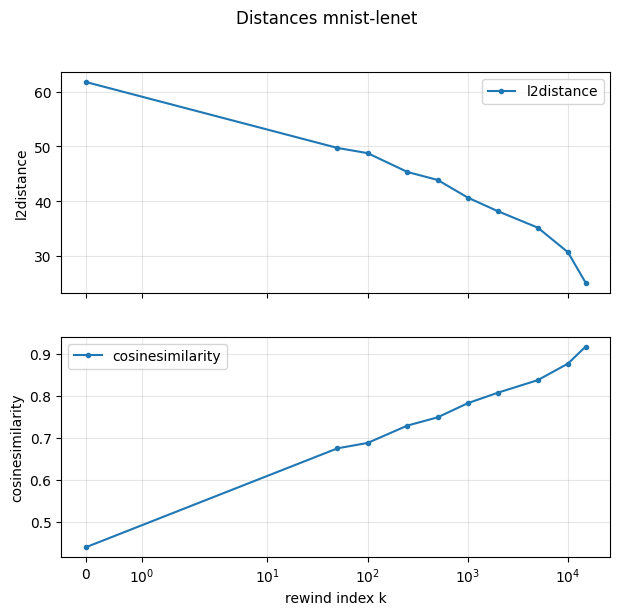

In [13]:
f = plot_distances(distances_df=insta.combined_results_dfs['distances'].loc['default_params'], title=f'Distances {spec}', save_format='png')

## CIFAR10 Instability analysis

In [8]:
spec = 'cifar10-lenet'
path = '/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/IA-B-cifar10-15.1.1-lenet--230120_140123/'
insta = InstabilityAnalyzer.reload(sweep_result_dir=path, instability_folder_suffix='Accuracy-nobn-1')

In [9]:
# load training jobs
sweepr = insta.instability_sweep
mainjob = insta.main_training_job

In [40]:
# mainjob.all_log_columns

In [41]:
mainjob.get_summary(log_source='val', col_sel='Accuracy')

,best_train_step,best_val_score,Accuracy-train_step-61000,seed
IA-A-cifar10-15.1.1-lenet--230120_134928,61000,0.559,0.559,0


In [42]:
sweepr.get_summary()

,best_train_step,best_val_score,trainer.resume_training.checkpoint_idx,seed
IA-B-cifar10-15.1.1-lenet--checkpoint_idx-0-seed-1--230120_142432,63500,0.5512,0,1
IA-B-cifar10-15.1.1-lenet--checkpoint_idx-100-seed-1--230120_142403,41500,0.5644,100,1
IA-B-cifar10-15.1.1-lenet--checkpoint_idx-1000-seed-1--230120_141158,45500,0.5598,1000,1
IA-B-cifar10-15.1.1-lenet--checkpoint_idx-10000-seed-1--230120_140133,64000,0.5596,10000,1
IA-B-cifar10-15.1.1-lenet--checkpoint_idx-15000-seed-1--230120_142558,64000,0.5604,15000,1
IA-B-cifar10-15.1.1-lenet--checkpoint_idx-2000-seed-1--230120_143525,64000,0.5640,2000,1
IA-B-cifar10-15.1.1-lenet--checkpoint_idx-250-seed-1--230120_141219,55500,0.5550,250,1
IA-B-cifar10-15.1.1-lenet--checkpoint_idx-50-seed-1--230120_140134,56500,0.5544,50,1
IA-B-cifar10-15.1.1-lenet--checkpoint_idx-500-seed-1--230120_141355,64000,0.5562,500,1
IA-B-cifar10-15.1.1-lenet--checkpoint_idx-5000-seed-1--230120_140133,59500,0.5636,5000,1


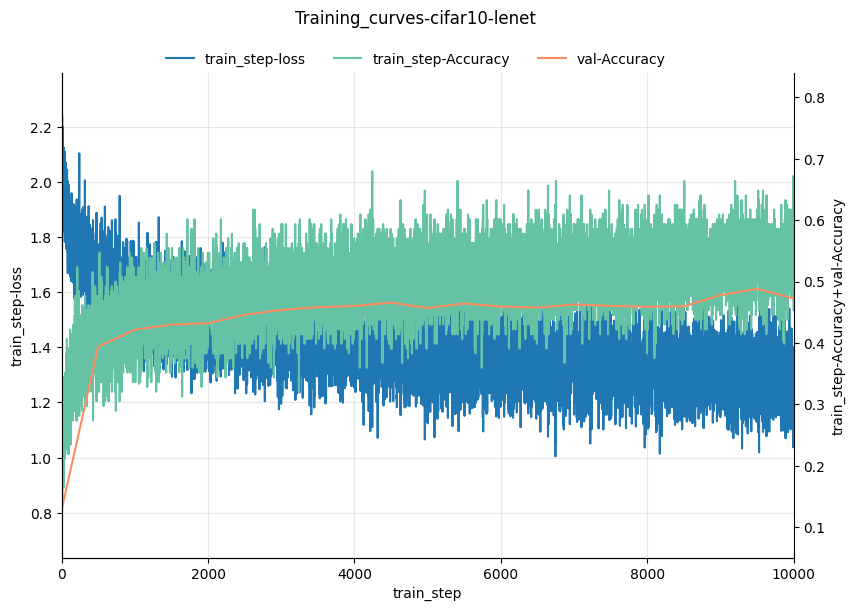

In [43]:
mj_dl = mainjob.get_data_log(['train_step', 'val'])
f = plot_data_log_values(mj_dl, y_axis_left=['train_step-loss'], y_axis_right=['train_step-Accuracy', 'val-Accuracy'], xlim=(0, 10000), x_axis='train_step', title=f'Training_curves-{spec}', savefig=True)

In [20]:
df = insta.combined_results_dfs['datasets'].loc['default_params']
df

datasets                                                                                                val  \
score                                                                                  interpolation_scores   
alpha                                                                                                  -0.1   
init_model_idx_k job                                             seeds  model_idxes                           
0                IA-B-cifar10-15.1.1-lenet--checkpoint_idx-0     (1, 0) (63500, 61000)             0.478516   
                                                                        (64001, 64001)             0.478516   
50               IA-B-cifar10-15.1.1-lenet--checkpoint_idx-50    (1, 0) (56500, 61000)             0.476367   
                                                                        (64000, 64001)             0.476367   
100              IA-B-cifar10-15.1.1-lenet--checkpoint_idx-100   (1, 0) (41500, 61000)             0.472070   
                                                                        (64000, 64001)             0.472070   
250              IA-B-cifar10-15.1.1-lenet--checkpoint_idx-250   (1, 0) (55500, 61000)             0.460156   
                                                                        (64000, 64001)             0.460156   
500              IA-B-cifar10-15.1.1-lenet--checkpoint_idx-500   (1, 0) (64000, 61000)             0.459961   
                                                                        (64000, 64001)             0.459961   
1000             IA-B-cifar10-15.1.1-lenet--checkpoint_idx-1000  (1, 0) (45500, 61000)             0.457227   
                                                                        (64001, 64001)             0.457227   
2000             IA-B-cifar10-15.1.1-lenet--checkpoint_idx-2000  (1, 0) (64000, 61000)             0.449609   
                                                                        (64000, 64001)             0.449609   
5000             IA-B-cifar10-15.1.1-lenet--checkpoint_idx-5000  (1, 0) (59500, 61000)             0.453516   
                                                                        (64000, 64001)             0.453516   
10000            IA-B-cifar10-15.1.1-lenet--checkpoint_idx-10000 (1, 0) (64000, 61000)             0.449805   
                                                                        (64000, 64001)             0.449805   
15000            IA-B-cifar10-15.1.1-lenet--checkpoint_idx-15000 (1, 0) (64000, 61000)             0.450586   
                                                                        (64000, 64001)             0.450586   

datasets                                                                                          \
score                                                                                              
alpha                                                                                        0.0   
init_model_idx_k job                                             seeds  model_idxes                
0                IA-B-cifar10-15.1.1-lenet--checkpoint_idx-0     (1, 0) (63500, 61000)  0.453711   
                                                                        (64001, 64001)  0.453711   
50               IA-B-cifar10-15.1.1-lenet--checkpoint_idx-50    (1, 0) (56500, 61000)  0.453906   
                                                                        (64000, 64001)  0.453906   
100              IA-B-cifar10-15.1.1-lenet--checkpoint_idx-100   (1, 0) (41500, 61000)  0.444922   
                                                                        (64000, 64001)  0.444922   
250              IA-B-cifar10-15.1.1-lenet--checkpoint_idx-250   (1, 0) (55500, 61000)  0.449219   
                                                                        (64000, 64001)  0.449219   
500              IA-B-cifar10-15.1.1-lenet--checkpoint_idx-500   (1, 0) (64000, 61000)  0.448047   
                                   

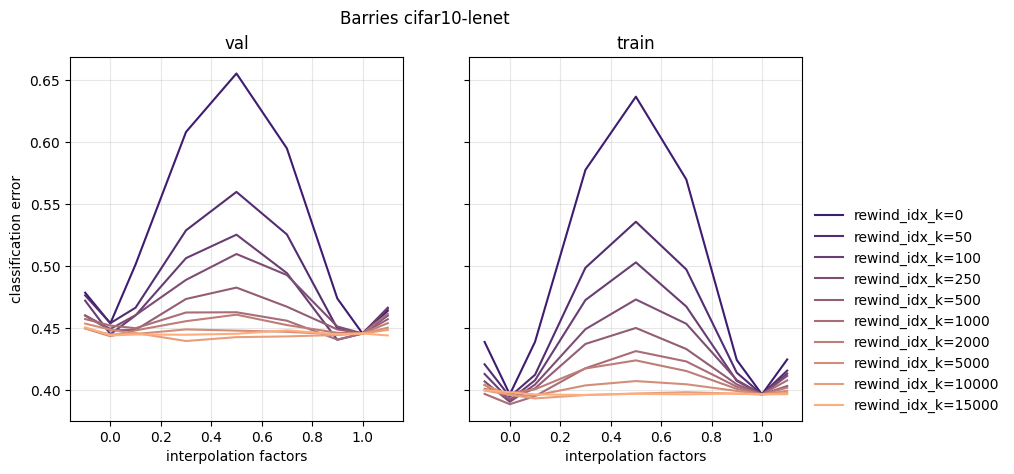

In [21]:
f = plot_barriers(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Barries {spec}', save_format='png')

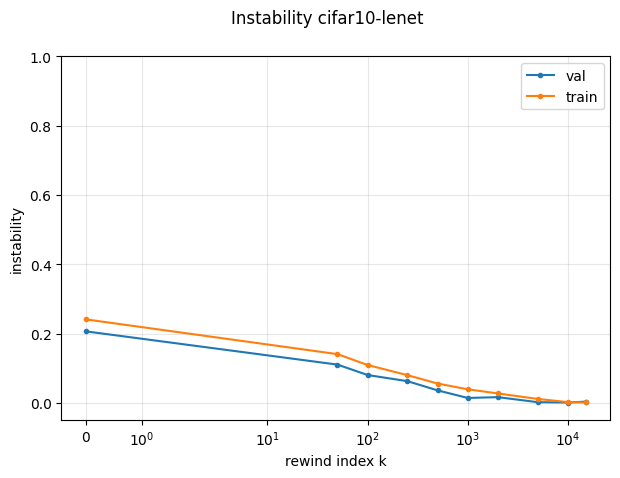

In [22]:
f = plot_instability(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Instability {spec}', x_scale='symlog', save_format='png')

In [10]:
grada = GradCovarianceAnalyzer(job=mainjob, checkpoint_idxs=[], num_batches=[25], batch_sizes=[128], device='cuda:0', save_folder_suffix='', save_to_disk=True)
stats, eigvals = grada.covariance_analysis()

Files already downloaded and verified


The save folder already exists. Reloading those results. To recompute choose different save_folder_suffix.


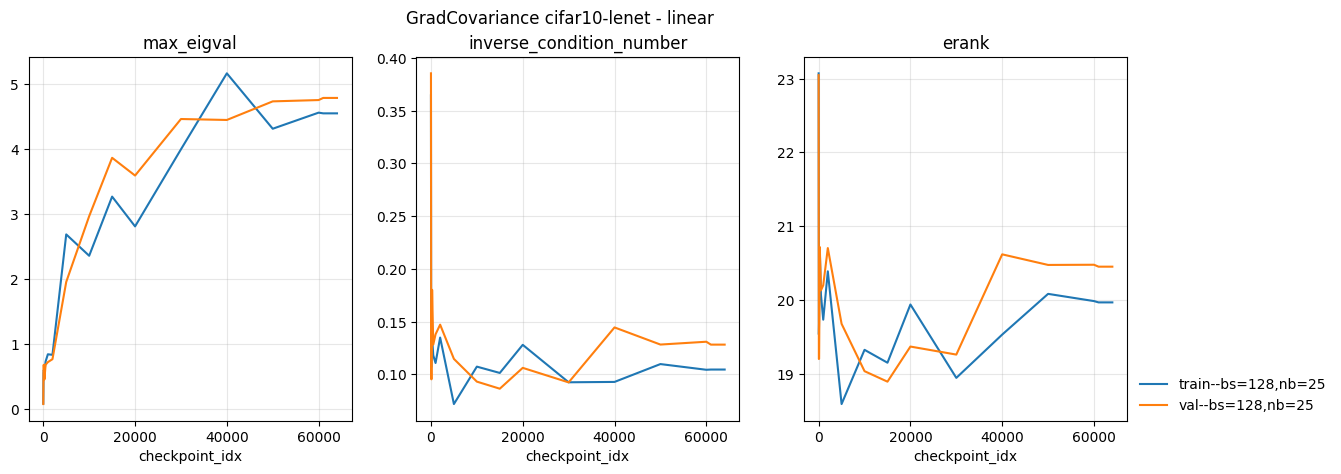

In [22]:
scale = 'linear'
f = plot_covariance_statistics(stats, title=f'GradCovariance {spec} - {scale}', save_format='png', x_scale=scale)

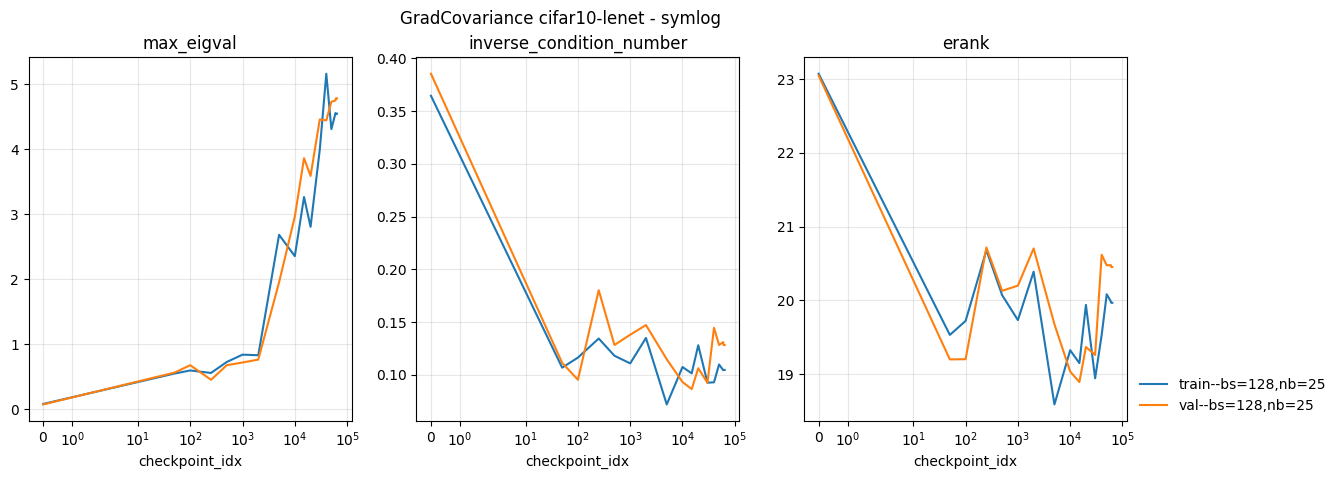

In [23]:
scale = 'symlog'
f = plot_covariance_statistics(stats, title=f'GradCovariance {spec} - {scale}', save_format='png', x_scale=scale)

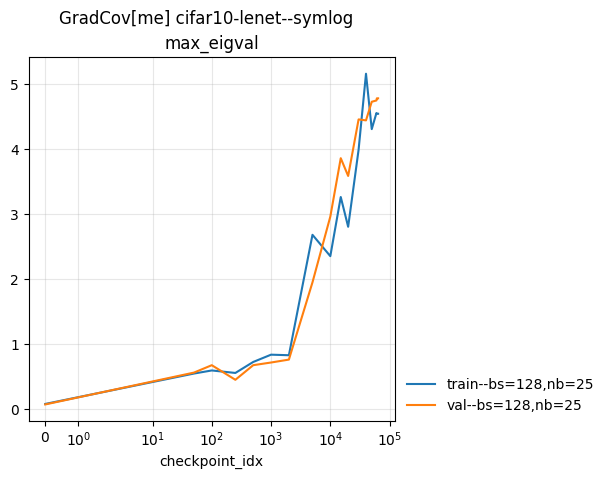

In [11]:
scale = 'symlog'
f = plot_covariance_statistics(stats, title=f'GradCov[me] {spec}--{scale}', save_format='png', x_scale=scale, statistic_names=['max_eigval'], figsize=(1 * 12 * 1 / 2.54, 1.5 * 8 * 1 / 2.54))

In [23]:
df = insta.combined_results_dfs['distances'].loc['default_params']
df

distances                                                                               l2distance  \
init_model_idx_k job                                             seeds  model_idxes                  
0                IA-B-cifar10-15.1.1-lenet--checkpoint_idx-0     (1, 0) (63500, 61000)  191.902832   
                                                                        (64001, 64001)  191.902832   
50               IA-B-cifar10-15.1.1-lenet--checkpoint_idx-50    (1, 0) (56500, 61000)  171.258926   
                                                                        (64000, 64001)  171.258926   
100              IA-B-cifar10-15.1.1-lenet--checkpoint_idx-100   (1, 0) (41500, 61000)  164.601837   
                                                                        (64000, 64001)  164.601837   
250              IA-B-cifar10-15.1.1-lenet--checkpoint_idx-250   (1, 0) (55500, 61000)  148.350952   
                                                                        (64000, 64001)  148.350952   
500              IA-B-cifar10-15.1.1-lenet--checkpoint_idx-500   (1, 0) (64000, 61000)  136.825790   
                                                                        (64000, 64001)  136.825790   
1000             IA-B-cifar10-15.1.1-lenet--checkpoint_idx-1000  (1, 0) (45500, 61000)  124.986969   
                                                                        (64001, 64001)  124.986969   
2000             IA-B-cifar10-15.1.1-lenet--checkpoint_idx-2000  (1, 0) (64000, 61000)  112.957230   
                                                                        (64000, 64001)  112.957230   
5000             IA-B-cifar10-15.1.1-lenet--checkpoint_idx-5000  (1, 0) (59500, 61000)   92.614487   
                                                                        (64000, 64001)   92.614487   
10000            IA-B-cifar10-15.1.1-lenet--checkpoint_idx-10000 (1, 0) (64000, 61000)   75.303253   
                                                                        (64000, 64001)   75.303253   
15000            IA-B-cifar10-15.1.1-lenet--checkpoint_idx-15000 (1, 0) (64000, 61000)   65.193756   
                                                                        (64000, 64001)   65.193756   

distances                                                                              cosinesimilarity  
init_model_idx_k job                                             seeds  model_idxes                      
0                IA-B-cifar10-15.1.1-lenet--checkpoint_idx-0     (1, 0) (63500, 61000)         0.102155  
                                                                        (64001, 64001)         0.102155  
50               IA-B-cifar10-15.1.1-lenet--checkpoint_idx-50    (1, 0) (56500, 61000)         0.286952  
                                                                        (64000, 64001)         0.286952  
100              IA-B-cifar10-15.1.1-lenet--checkpoint_idx-100   (1, 0) (41500, 61000)         0.339496  
                                                                        (64000, 64001)         0.339496  
250              IA-B-cifar10-15.1.1-lenet--checkpoint_idx-250   (1, 0) (55500, 61000)         0.467007  
                                                                        (64000, 64001)         0.467007  
500              IA-B-cifar10-15.1.1-lenet--checkpoint_idx-500   (1, 0) (64000, 61000)         0.543534  
                                                                        (64000, 64001)         0.543534  
1000             IA-B-cifar10-15.1.1-lenet--checkpoint_idx-1000  (1, 0) (45500, 61000)         0.618665  
                                                                        (64001, 64001)         0.618665  
2000             IA-B-cifar10-15.1.1-lenet--checkpoint_idx-2000  (1, 0) (64000, 61000)         0.689652  
                                                                        (64000, 64001)         0.689652  
5000             IA-B-cifar10-15.1.1-lenet--checkpoint_idx-

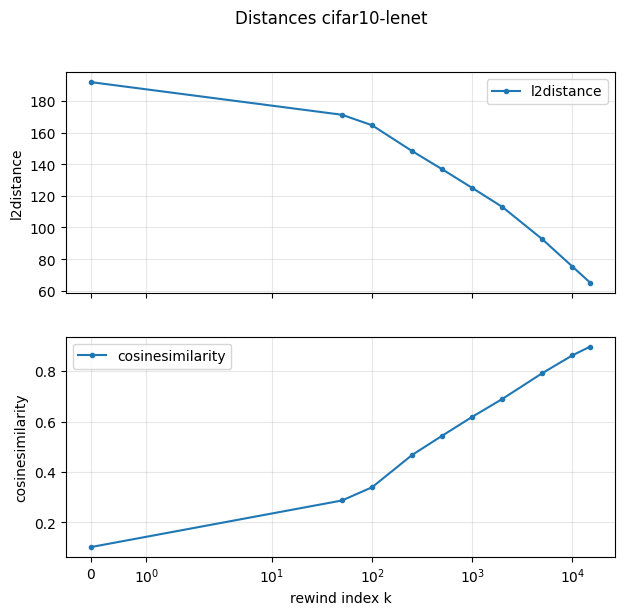

In [24]:
f = plot_distances(distances_df=insta.combined_results_dfs['distances'].loc['default_params'], title=f'Distances {spec}', save_format='png')